# 1 MuSCAT2 data reduction
# 1.3 Reduction of the M2 light curve from 2.1.2019

**Note (11.11.2019): this notebook requires the MuSCAT2 photometry pipeline, which is not publicly available at the moment. I'll add the necessary classes to this repo soon.**

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
from muscat2ta.transitanalysis import NP, UP, TransitAnalysis as TA
from corner import corner
import seaborn as sb

In [10]:
ta = TA('toi00263.01', '190102', 0, [2,3,4,5,6,7], aperture_lims=(1, 4), nlegendre=0, use_opencl=True, 
        npop=400, with_contamination=False, radius_ratio='chromatic')

In [11]:
ta.set_prior(1, NP(0.557 , 0.001))
[ta.set_prior(4+i, UP(0.12**2, 0.30**2)) for i in range(3)]

[None, None, None]

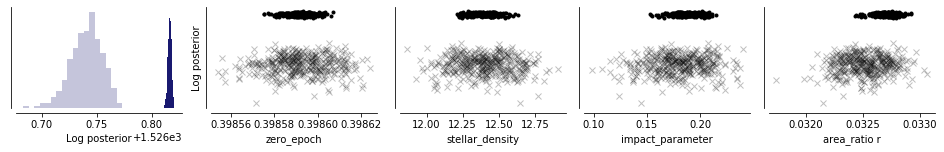

In [20]:
ta.optimize(1500)

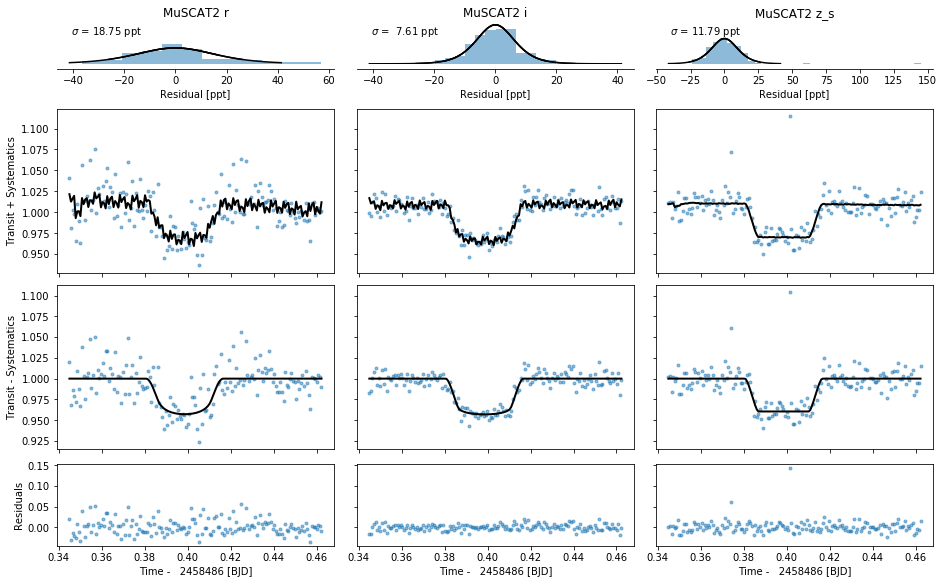

In [21]:
fig = ta.plot_light_curve()

In [22]:
ta.freeze_photometry()

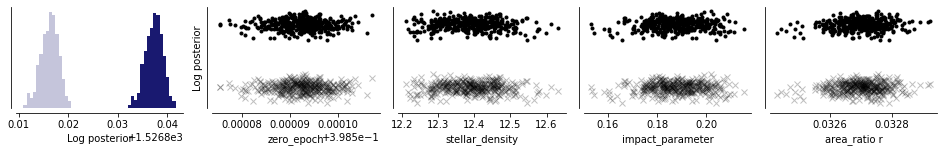

In [23]:
ta.optimize(500)

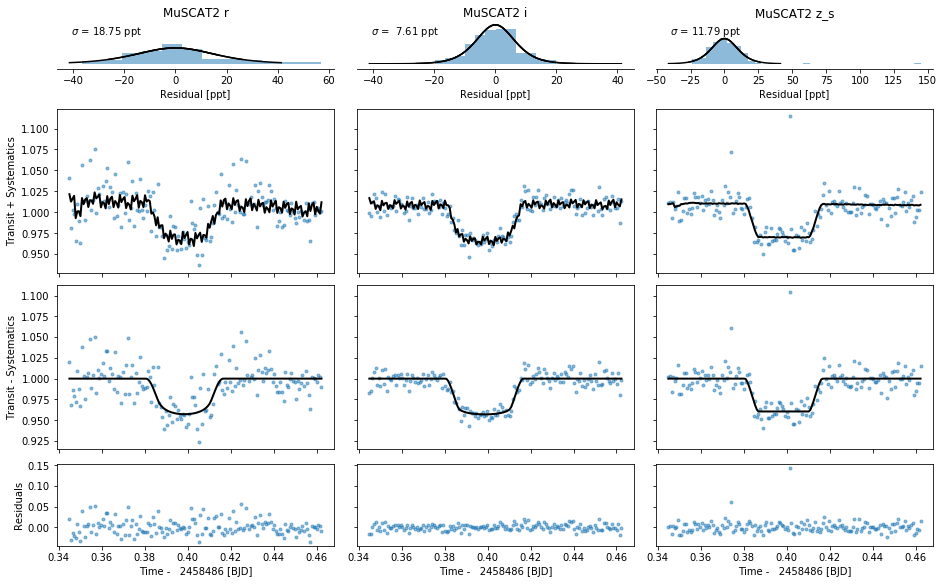

In [24]:
fig = ta.plot_light_curve(save=True)

In [32]:
ta.sample(4000, 40, repeats=2)

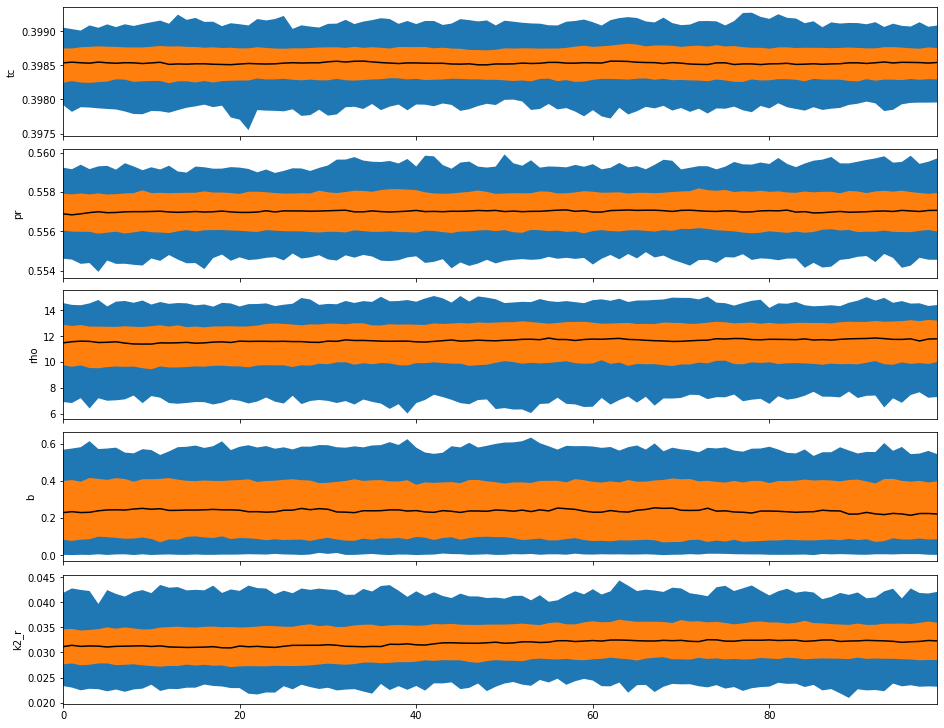

In [33]:
ta.lpf.plot_chains()

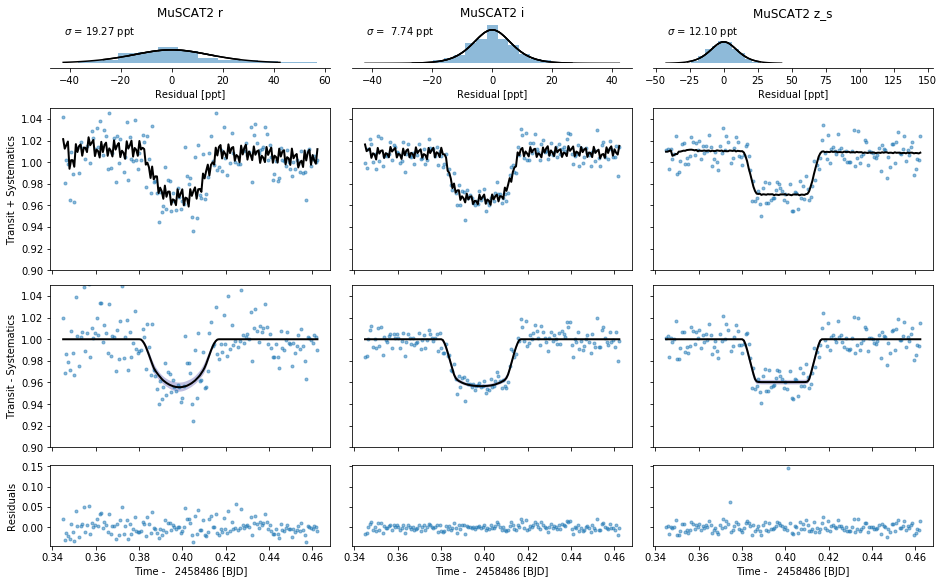

In [34]:
fig, axs = ta.lpf.plot_light_curves('mc')
setp(axs[1], ylim=(0.9,1.05));
setp(axs[2], ylim=(0.9,1.05));

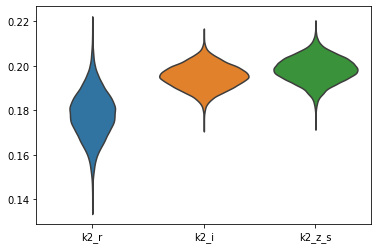

In [35]:
df = ta.posterior_samples()
sb.violinplot(data=sqrt(df.iloc[:,4:]), inner=None)

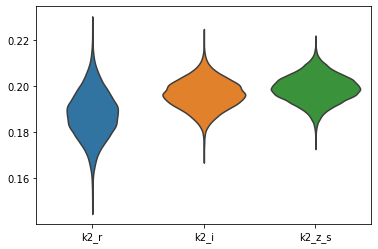

In [46]:
df = ta.posterior_samples()
sb.violinplot(data=sqrt(df.iloc[:,4:]), inner=None)

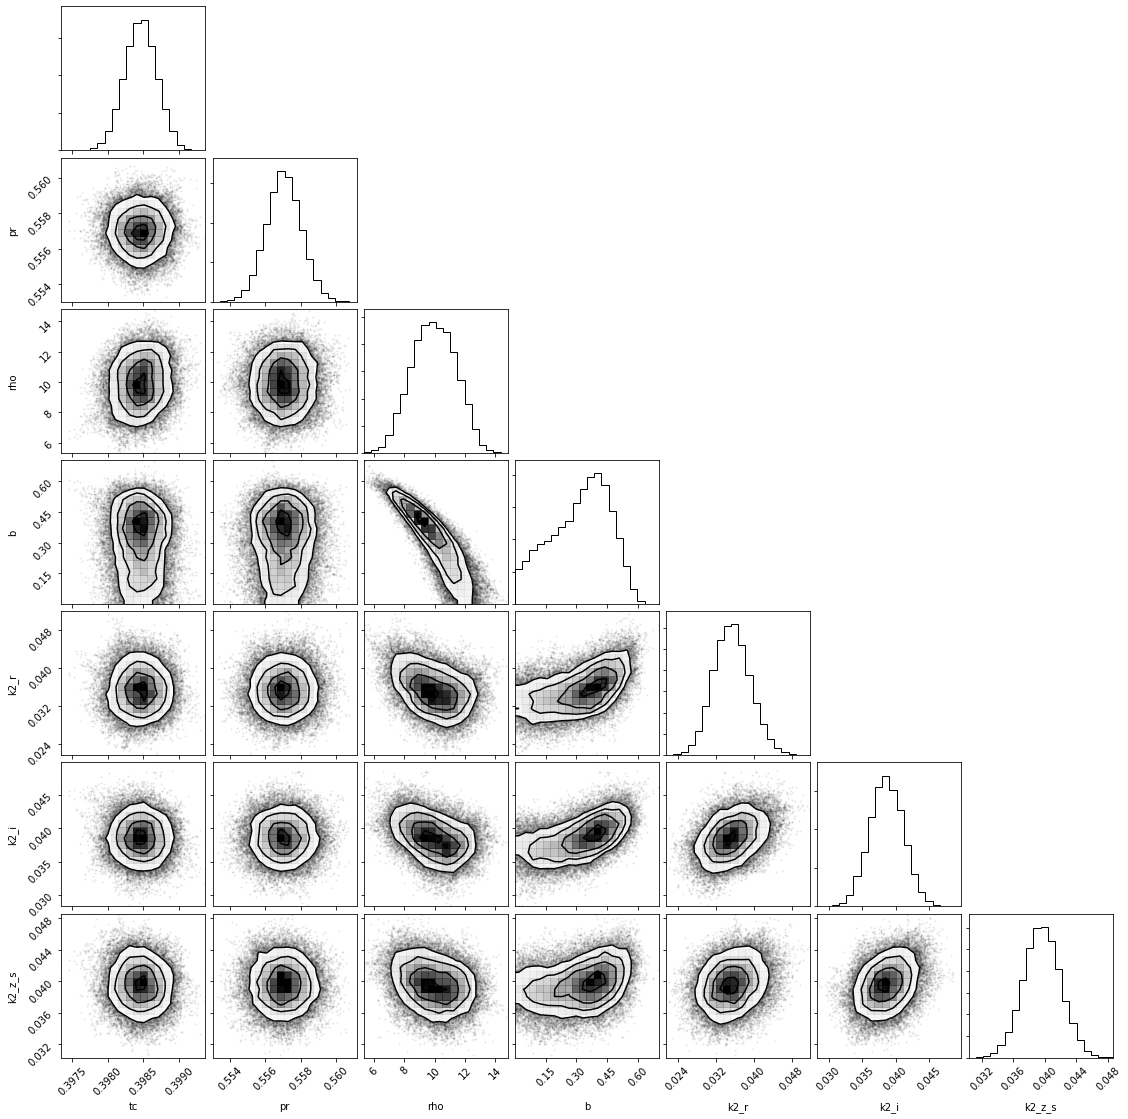

In [44]:
corner(df);

In [45]:
ta.save()
ta.save_fits()

---

<center> © 2019 Hannu Parviainen </center>